# Marketing_Data_Analysis

## Context
__Problem Statement__

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## Content
__Attributes__

People

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if customer complained in the last 2 years, 0 otherwise

Products

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

Promotion

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place

- NumWebPurchases: Number of purchases made through the company’s web site
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s web site in the last month

Target

- Need to perform clustering to summarize customer segments.

# Import library

In [1]:
#pip install seaborn==0.11.0

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling as pdf
import seaborn as sns
import datetime


%matplotlib inline
sns.set_theme()

#### set the parameters for Seaborn

In [2]:
PALETTE = sns.color_palette("Set3")
PALETTE

[(0.5529411764705883, 0.8274509803921568, 0.7803921568627451),
 (1.0, 1.0, 0.7019607843137254),
 (0.7450980392156863, 0.7294117647058823, 0.8549019607843137),
 (0.984313725490196, 0.5019607843137255, 0.4470588235294118),
 (0.5019607843137255, 0.6941176470588235, 0.8274509803921568),
 (0.9921568627450981, 0.7058823529411765, 0.3843137254901961),
 (0.7019607843137254, 0.8705882352941177, 0.4117647058823529),
 (0.9882352941176471, 0.803921568627451, 0.8980392156862745),
 (0.8509803921568627, 0.8509803921568627, 0.8509803921568627),
 (0.7372549019607844, 0.5019607843137255, 0.7411764705882353),
 (0.8, 0.9215686274509803, 0.7725490196078432),
 (1.0, 0.9294117647058824, 0.43529411764705883)]

In [3]:
sns.set_context("paper", rc={"font.size":15, 
                             "figure.titlesize":20, 
                             "axes.titlesize":15, 
                             "axes.labelsize":13, 
                             "xtick.labelsize": 13,
                             "ytick.labelsize": 13,
                             "legend.fontsize": 10,
                             "legend.title_fontsize": 15}) 

## Import of data and first look with pandas_profiling

In [4]:
pd.options.display.max_columns = 28

In [5]:
data = pd.read_csv('C:/Users/JeanPhilippeNdri/Desktop/DataSet/marketing_campaign.csv', sep='\t', 
                   index_col='ID', 
                   parse_dates=['Dt_Customer'])


In [6]:
data.head()

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
ID                                                                        
5524        1957  Graduation         Single  58138.0        0         0   
2174        1954  Graduation         Single  46344.0        1         1   
4141        1965  Graduation       Together  71613.0        0         0   
6182        1984  Graduation       Together  26646.0        1         0   
5324        1981         PhD        Married  58293.0        1         0   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
ID                                                                
5524  2012-04-09       58       635         88              546   
2174  2014-08-03       38        11          1                6   
4141  2013-08-21       26       426         49              127   
6182  2014-10-02       26        11          4               20   
5324  2014-01-19       94       173         43              118   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
ID                                                                         
5524              172                88            88                  3   
2174                2                 1             6                  2   
4141              111                21            42                  1   
6182               10                 3             5                  2   
5324               46                27            15                  5   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
ID                                                              
5524                8                   10                  4   
2174                1                    1                  2   
4141                8                    2                 10   
6182                2                    0                  4   
5324                5                    3                  6   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
ID                                                                  
5524                  7             0             0             0   
2174                  5             0             0             0   
4141                  4             0             0             0   
6182                  6             0             0             0   
5324                  5             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  
ID                                                                              
5524             0             0         0              3         11         1  
2174             0             0         0              3         11         0  
4141             0             0         0              3         11         0  
6182             0             0         0              3         11         0  
5324             0             0         0              3         11         0

Les colonnes Z Revenue et Z CostContact n'ont pas été mentionné dans la description dataset

In [7]:
display(data['Z_Revenue'].value_counts())
display(data['Z_CostContact'].value_counts())

11    2240
Name: Z_Revenue, dtype: int64

3    2240
Name: Z_CostContact, dtype: int64

Les colonnes Z Revenue et Z CostContact contiennent que des valeurs uniques, nous pouvons les supprimer.

In [8]:
data.drop(columns=['Z_Revenue', 'Z_CostContact'], inplace=True)

In [9]:
nrows = data.shape[0]
ncols = data.shape[1]
cols = data.columns
display(nrows,ncols,data.shape)

2240

26

(2240, 26)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 5524 to 9405
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2240 non-null   int64         
 1   Education            2240 non-null   object        
 2   Marital_Status       2240 non-null   object        
 3   Income               2216 non-null   float64       
 4   Kidhome              2240 non-null   int64         
 5   Teenhome             2240 non-null   int64         
 6   Dt_Customer          2240 non-null   datetime64[ns]
 7   Recency              2240 non-null   int64         
 8   MntWines             2240 non-null   int64         
 9   MntFruits            2240 non-null   int64         
 10  MntMeatProducts      2240 non-null   int64         
 11  MntFishProducts      2240 non-null   int64         
 12  MntSweetProducts     2240 non-null   int64         
 13  MntGoldProds         2240 non-

## Duplicates

In [11]:
data[data.duplicated(keep=False)].sort_values(by='Income')

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
ID                                                                         
6864         1989      Master       Divorced  10979.0        0         0   
10617        1989      Master       Divorced  10979.0        0         0   
234          1979  Graduation       Divorced  15287.0        1         0   
10264        1979  Graduation       Divorced  15287.0        1         0   
8420         1970    2n Cycle        Married  15315.0        0         0   
...           ...         ...            ...      ...      ...       ...   
5536         1959  Graduation       Together  87771.0        0         1   
6024         1953  Graduation       Together  94384.0        0         0   
5386         1953  Graduation       Together  94384.0        0         0   
4248         1960      Master         Single  98777.0        0         0   
7451         1960      Master         Single  98777.0        0         0   

      Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
ID                                                                 
6864   2014-05-22       34         8          4               10   
10617  2014-05-22       34         8          4               10   
234    2012-10-10       60         1          2                8   
10264  2012-10-10       60         1          2                8   
8420   2013-03-08       27         7          4               13   
...           ...      ...       ...        ...              ...   
5536   2013-05-22       61      1492         38              287   
6024   2013-04-03       62      1111         24              790   
5386   2013-04-03       62      1111         24              790   
4248   2014-02-17       23      1000         19              711   
7451   2014-02-17       23      1000         19              711   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
ID                                                                          
6864                 2                 2             4                  2   
10617                2                 2             4                  2   
234                  4                 3            13                  2   
10264                4                 3            13                  2   
8420                15                 8            17                  2   
...                ...               ...           ...                ...   
5536                50                57            33                  1   
6024               160                45           172                  0   
5386               160                45           172                  0   
4248               125               115            38                  0   
7451               125               115            38                  0   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
ID                                                               
6864                 3                    0                  3   
10617                3                    0                  3   
234                  1                    1                  2   
10264                1                    1                  2   
8420                 2                    0                  4   
...                ...                  ...                ...   
5536                 5                   10                  4   
6024                 5                    8                  5   
5386                 5                    8                  5   
4248                 4                    6                  9   
7451                 4                    6                  9   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
ID                                                                   
6864                   5             0             0             0   
10617                  5             0             0          

qu'est ce que vous souhaitez qu'on fasse

In [12]:
data.drop_duplicates(inplace=True)
data

Year_Birth   Education Marital_Status    Income  Kidhome  Teenhome  \
ID                                                                          
5524         1957  Graduation         Single   58138.0        0         0   
2174         1954  Graduation         Single   46344.0        1         1   
4141         1965  Graduation       Together   71613.0        0         0   
6182         1984  Graduation       Together   26646.0        1         0   
5324         1981         PhD        Married   58293.0        1         0   
...           ...         ...            ...       ...      ...       ...   
9432         1977  Graduation       Together  666666.0        1         0   
10870        1967  Graduation        Married   61223.0        0         1   
7270         1981  Graduation       Divorced   56981.0        0         0   
8235         1956      Master       Together   69245.0        0         1   
9405         1954         PhD        Married   52869.0        1         1   

      Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
ID                                                                 
5524   2012-04-09       58       635         88              546   
2174   2014-08-03       38        11          1                6   
4141   2013-08-21       26       426         49              127   
6182   2014-10-02       26        11          4               20   
5324   2014-01-19       94       173         43              118   
...           ...      ...       ...        ...              ...   
9432   2013-02-06       23         9         14               18   
10870  2013-06-13       46       709         43              182   
7270   2014-01-25       91       908         48              217   
8235   2014-01-24        8       428         30              214   
9405   2012-10-15       40        84          3               61   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
ID                                                                          
5524               172                88            88                  3   
2174                 2                 1             6                  2   
4141               111                21            42                  1   
6182                10                 3             5                  2   
5324                46                27            15                  5   
...                ...               ...           ...                ...   
9432                 8                 1            12                  4   
10870               42               118           247                  2   
7270                32                12            24                  1   
8235                80                30            61                  2   
9405                 2                 1            21                  3   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
ID                                                               
5524                 8                   10                  4   
2174                 1                    1                  2   
4141                 8                    2                 10   
6182                 2                    0                  4   
5324                 5                    3                  6   
...                ...                  ...                ...   
9432                 3                    1                  3   
10870                9                    3                  4   
7270                 2                    3                 13   
8235                 6                    5                 10   
9405                 3                    1                  4   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
ID                                                                   
5524                   7             0             0             0   
2174                   5             0           

### First Pandas_Profiling

In [13]:
#summary=pdfb.ProfileReport(data)
#summary

In [13]:
date = datetime.date.today()
year = int(date.strftime("%Y"))
year

2021

In [14]:
data.insert(1, 'Age', year - data['Year_Birth'])
data.insert(2, 'CustomerFor', (np.datetime64('2021-12-07') - data['Dt_Customer']).dt.days)

In [15]:
data.drop(columns=['Year_Birth', 'Dt_Customer'], inplace=True)

##### Changer le type des variables 

In [16]:
# Acceptation de la plainte 1 = Acceptée et 0 sinon
AcceptedCmpToReplace = [1,0]
AcceptedCmpValues = ["Acceptée","Refusée"]
data[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5']] = data[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5']].replace(to_replace=AcceptedCmpToReplace, value=AcceptedCmpValues)

# Client s'est plaint (Complain) 1 = Oui 0 sinon
ComplainToReplace = [1,0]
ComplainValues = ["Oui","Non"]
data['Complain'] = data['Complain'].replace(to_replace=ComplainToReplace, value=ComplainValues)

# Réponse à l'offre par le client 1 = Acceptée et 0 sinon
ResponseToReplace = [1,0]
ResponseValues = ["Acceptée","Refusée"]
data['Response'] = data['Response'].replace(to_replace=ResponseToReplace, value=ResponseValues)

In [17]:
categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols   = data.select_dtypes(exclude=['object']).columns
datetime_cols    = data.select_dtypes(include=['datetime64']).columns

display(categorical_cols,numerical_cols,datetime_cols)

Index(['Education', 'Marital_Status', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

Index(['Age', 'CustomerFor', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth'],
      dtype='object')

Index([], dtype='object')

In [18]:
#Remplace les valeurs vide par la médiane.
data['Income'].fillna(data['Income'].median(), inplace=True)

## Distribution 

###### Nous avaons choisir de regarder la distribution des variables suivante Age Income Education Marital status Kidhome and Teenhome Amount spent

### AGE

In [20]:
#data.query('Age > 100')
data =data[data['Age']<100]
data

Age  CustomerFor   Education Marital_Status    Income  Kidhome  \
ID                                                                      
5524    64         3529  Graduation         Single   58138.0        0   
2174    67         2683  Graduation         Single   46344.0        1   
4141    56         3030  Graduation       Together   71613.0        0   
6182    37         2623  Graduation       Together   26646.0        1   
5324    40         2879         PhD        Married   58293.0        1   
...    ...          ...         ...            ...       ...      ...   
9432    44         3226  Graduation       Together  666666.0        1   
10870   54         3099  Graduation        Married   61223.0        0   
7270    40         2873  Graduation       Divorced   56981.0        0   
8235    65         2874      Master       Together   69245.0        0   
9405    67         3340         PhD        Married   52869.0        1   

       Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
ID                                                               
5524          0       58       635         88              546   
2174          1       38        11          1                6   
4141          0       26       426         49              127   
6182          0       26        11          4               20   
5324          0       94       173         43              118   
...         ...      ...       ...        ...              ...   
9432          0       23         9         14               18   
10870         1       46       709         43              182   
7270          0       91       908         48              217   
8235          1        8       428         30              214   
9405          1       40        84          3               61   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
ID                                                                          
5524               172                88            88                  3   
2174                 2                 1             6                  2   
4141               111                21            42                  1   
6182                10                 3             5                  2   
5324                46                27            15                  5   
...                ...               ...           ...                ...   
9432                 8                 1            12                  4   
10870               42               118           247                  2   
7270                32                12            24                  1   
8235                80                30            61                  2   
9405                 2                 1            21                  3   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
ID                                                               
5524                 8                   10                  4   
2174                 1                    1                  2   
4141                 8                    2                 10   
6182                 2                    0                  4   
5324                 5                    3                  6   
...                ...                  ...                ...   
9432                 3                    1                  3   
10870                9                    3                  4   
7270                 2                    3                 13   
8235                 6                    5                 10   
9405                 3                    1                  4   

       NumWebVisitsMonth AcceptedCmp3 AcceptedCmp4 AcceptedCmp5 AcceptedCmp1  \
ID                                                                             
5524                   7      Refusée      Refusée      Refusée      Refusée   
2174                   5      Refusée      Refusée      Refusée      Refusée   
4141             

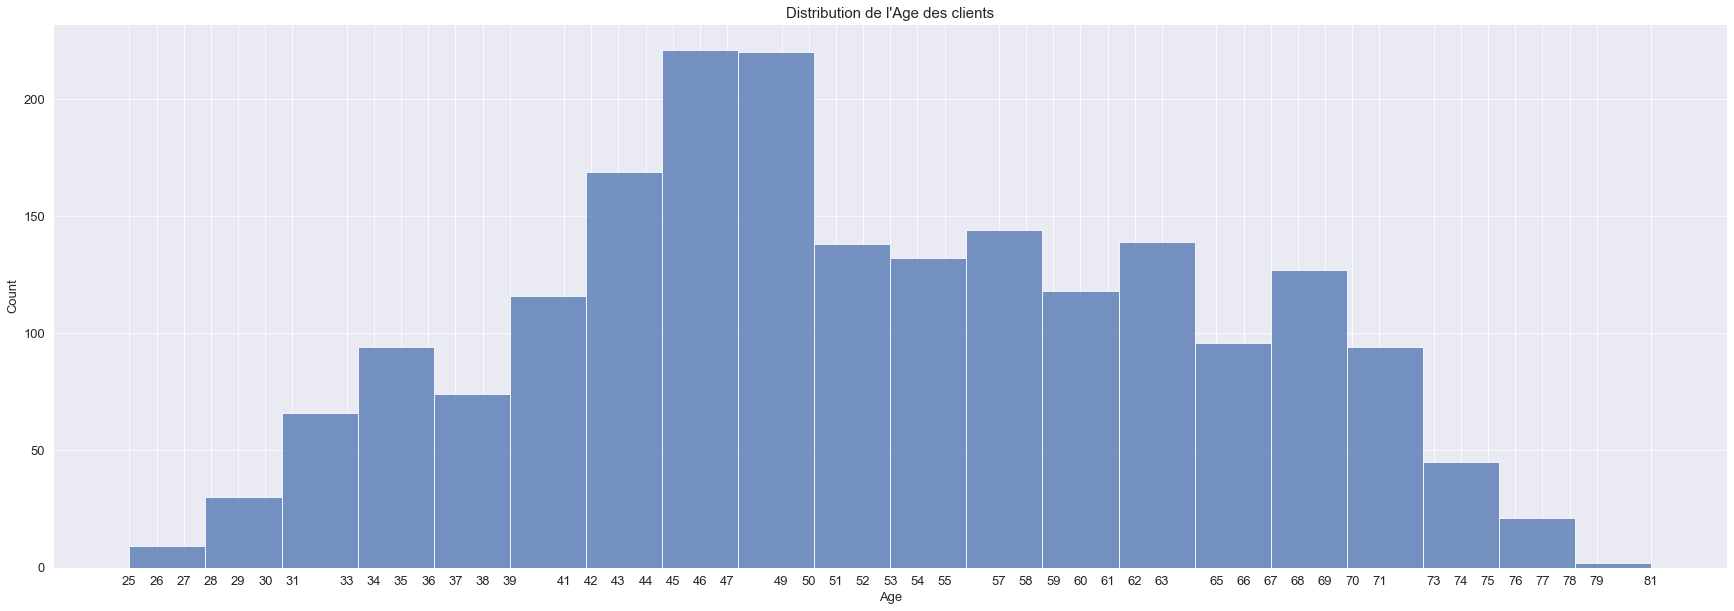

In [21]:
plt.figure(figsize=(30,10))
plt.title("Distribution de l'Age des clients")
ax = sns.histplot(data['Age'].sort_values())
plt.xticks(np.linspace(data['Age'].min(),data['Age'].max(),dtype=int, endpoint=True))
plt.show()

### INCOME

In [22]:
data.query('Income > 600000')
data =data[data['Income']<600000]
data

Age  CustomerFor   Education Marital_Status   Income  Kidhome  \
ID                                                                     
5524    64         3529  Graduation         Single  58138.0        0   
2174    67         2683  Graduation         Single  46344.0        1   
4141    56         3030  Graduation       Together  71613.0        0   
6182    37         2623  Graduation       Together  26646.0        1   
5324    40         2879         PhD        Married  58293.0        1   
...    ...          ...         ...            ...      ...      ...   
8080    35         3399  Graduation         Single  26816.0        0   
10870   54         3099  Graduation        Married  61223.0        0   
7270    40         2873  Graduation       Divorced  56981.0        0   
8235    65         2874      Master       Together  69245.0        0   
9405    67         3340         PhD        Married  52869.0        1   

       Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
ID                                                               
5524          0       58       635         88              546   
2174          1       38        11          1                6   
4141          0       26       426         49              127   
6182          0       26        11          4               20   
5324          0       94       173         43              118   
...         ...      ...       ...        ...              ...   
8080          0       50         5          1                6   
10870         1       46       709         43              182   
7270          0       91       908         48              217   
8235          1        8       428         30              214   
9405          1       40        84          3               61   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
ID                                                                          
5524               172                88            88                  3   
2174                 2                 1             6                  2   
4141               111                21            42                  1   
6182                10                 3             5                  2   
5324                46                27            15                  5   
...                ...               ...           ...                ...   
8080                 3                 4             3                  1   
10870               42               118           247                  2   
7270                32                12            24                  1   
8235                80                30            61                  2   
9405                 2                 1            21                  3   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
ID                                                               
5524                 8                   10                  4   
2174                 1                    1                  2   
4141                 8                    2                 10   
6182                 2                    0                  4   
5324                 5                    3                  6   
...                ...                  ...                ...   
8080                 0                    0                  3   
10870                9                    3                  4   
7270                 2                    3                 13   
8235                 6                    5                 10   
9405                 3                    1                  4   

       NumWebVisitsMonth AcceptedCmp3 AcceptedCmp4 AcceptedCmp5 AcceptedCmp1  \
ID                                                                             
5524                   7      Refusée      Refusée      Refusée      Refusée   
2174                   5      Refusée      Refusée      Refusée      Refusée   
4141                   4      

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


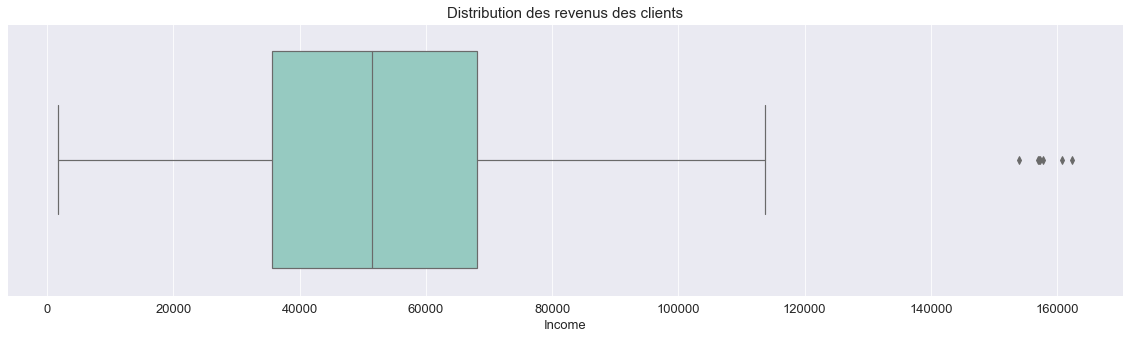

In [23]:
plt.figure(figsize=(20,5))
plt.title('Distribution des revenus des clients')
ax = sns.boxplot(data['Income'],palette=PALETTE)
plt.show()

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


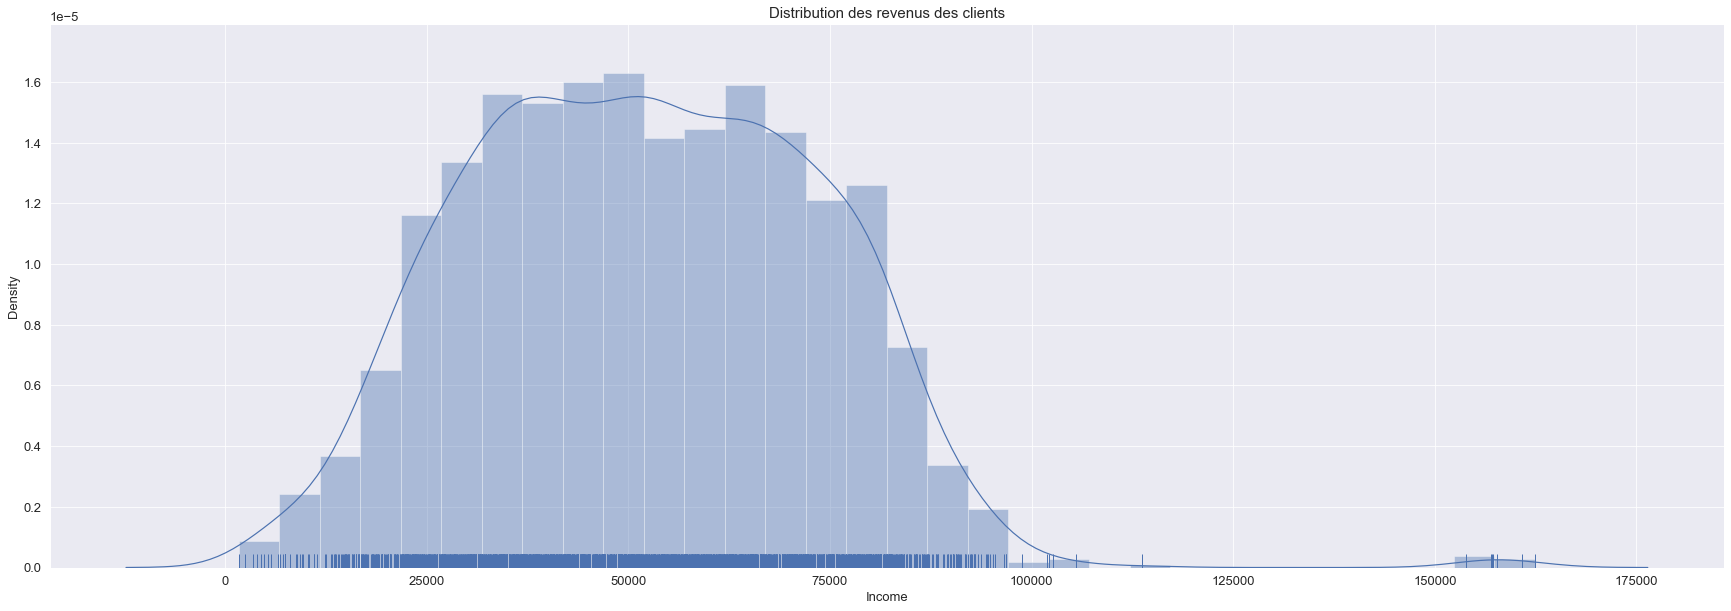

In [24]:
plt.figure(figsize=(30,10))
plt.title("Distribution des revenus des clients")
ax = sns.distplot(data.query('Income < 180000')['Income'],rug=True,kde=True)
plt.show()

### EDUCATION

In [25]:
data['Education'].value_counts()

Graduation    1029
PhD            449
Master         341
2n Cycle       186
Basic           49
Name: Education, dtype: int64

In [26]:
valeur=dict(data['Education'].value_counts())
valeur.values()

dict_values([1029, 449, 341, 186, 49])

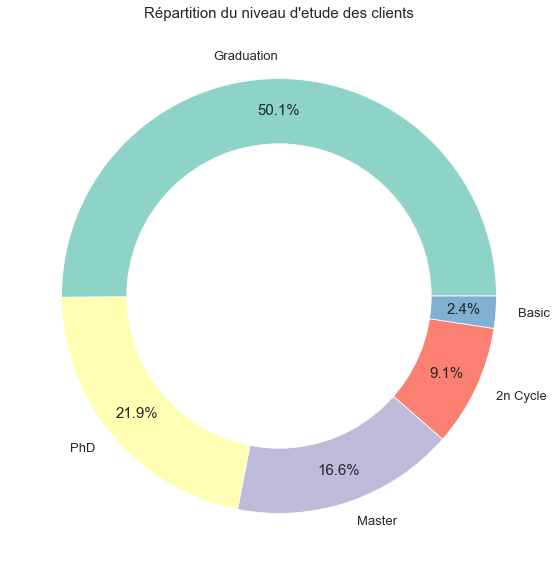

In [33]:
plt.figure(figsize=(30,10))
plt.title("Répartition du niveau d'etude des clients")
plt.pie(valeur.values(),labels=valeur.keys(),colors=PALETTE,autopct='%1.1f%%',shadow=False,pctdistance=0.85)
#plt.legend(title='Legend',labels=valeur.keys(),bbox_to_anchor=(2,1))


# add a circle at the center to transform it in a donut chart
circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(circle)

plt.show()

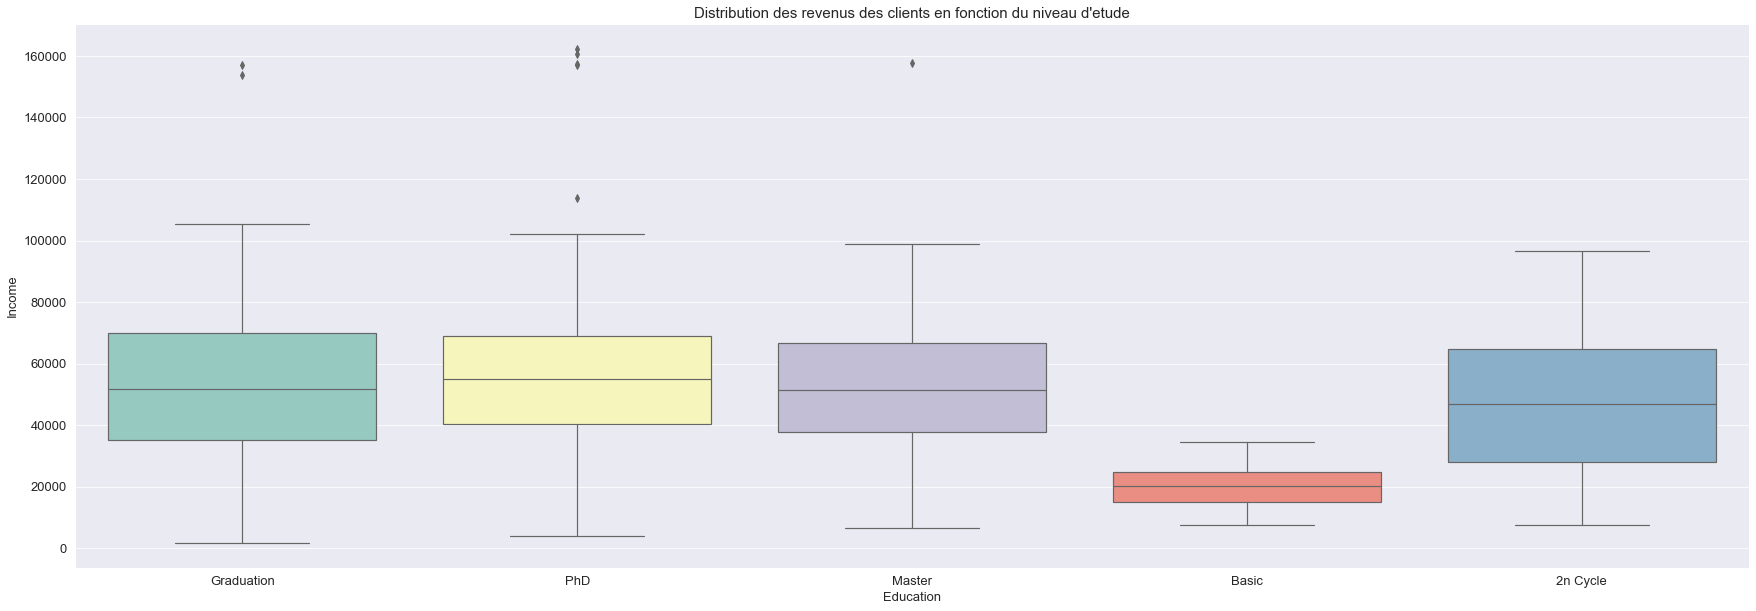

In [34]:
plt.figure(figsize=(30,10))
plt.title("Distribution des revenus des clients en fonction du niveau d'etude")
sns.boxplot(data=data.query('Income < 180000'),x='Education',y='Income',palette=PALETTE)
plt.show()

### Marital status

In [35]:
data.drop(data.loc[data['Marital_Status']=='YOLO'].index, inplace=True)
data.drop(data.loc[data['Marital_Status']=='Absurd'].index, inplace=True)

D:\Anaconda\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [36]:
data['Marital_Status'].value_counts()

Married     795
Together    519
Single      447
Divorced    215
Widow        71
Alone         3
Name: Marital_Status, dtype: int64

In [37]:
data['Marital_Status'] = data['Marital_Status'].replace(to_replace='Alone', value='Single')

<ipython-input-37-99e70096a63d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Marital_Status'] = data['Marital_Status'].replace(to_replace='Alone', value='Single')


In [38]:
valeur2=dict(data['Marital_Status'].value_counts())
valeur2.values()

dict_values([795, 519, 450, 215, 71])

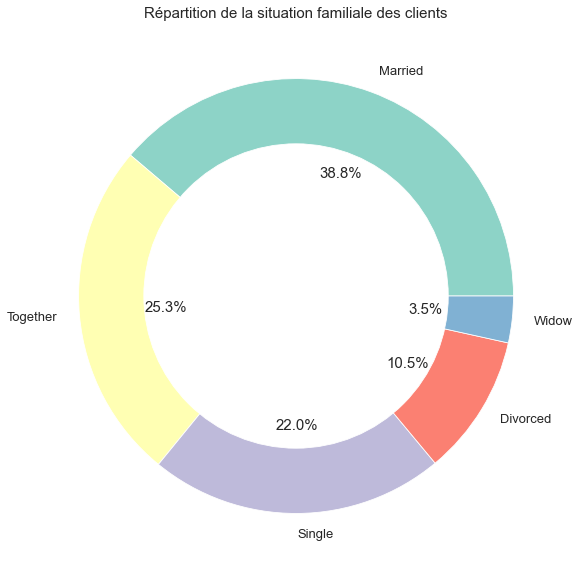

In [39]:
plt.figure(figsize=(30,10))
plt.title("Répartition de la situation familiale des clients")
plt.pie(valeur2.values(),labels=valeur2.keys(),colors=PALETTE,autopct='%1.1f%%',shadow=False)
#plt.legend(title='Legend',labels=valeur.keys(),bbox_to_anchor=(2,1))


# add a circle at the center to transform it in a donut chart
circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(circle)

plt.show()

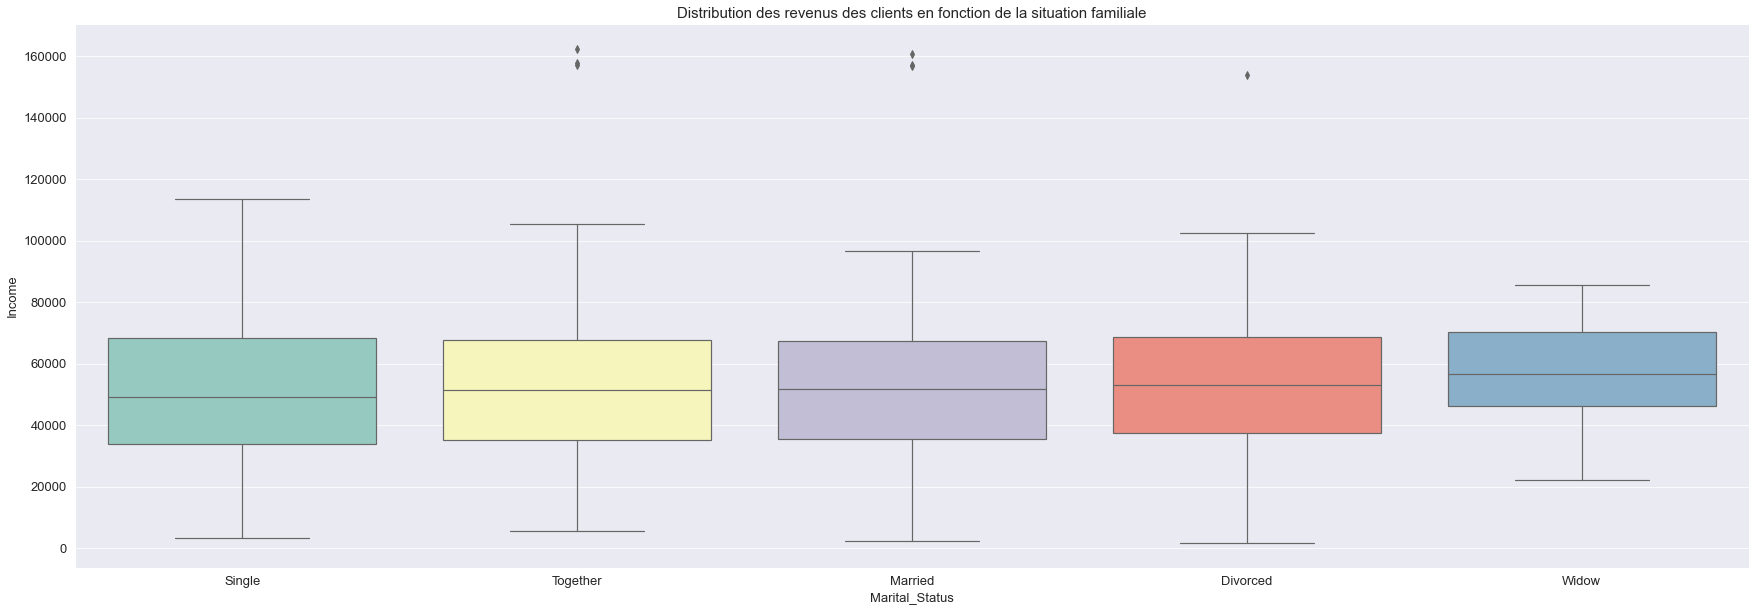

In [40]:
plt.figure(figsize=(30,10))
plt.title("Distribution des revenus des clients en fonction de la situation familiale")
sns.boxplot(data=data.query('Income < 180000'),x='Marital_Status',y='Income',palette=PALETTE)
plt.show()

### Kidhome and Teenhome

In [41]:
display(data['Kidhome'].value_counts())
display(data['Teenhome'].value_counts())

0    1178
1     829
2      43
Name: Kidhome, dtype: int64

0    1055
1     945
2      50
Name: Teenhome, dtype: int64

In [42]:
data['NumberOfChildren']=(data['Kidhome']+data['Teenhome'])
data['NumberOfChildren']
display(data['NumberOfChildren'])

<ipython-input-42-db07ebb59f20>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['NumberOfChildren']=(data['Kidhome']+data['Teenhome'])


ID
5524     0
2174     2
4141     0
6182     1
5324     1
        ..
8080     0
10870    1
7270     0
8235     1
9405     2
Name: NumberOfChildren, Length: 2050, dtype: int64

## Amount spent

In [45]:
mt = data.filter(like='Mnt').apply(lambda x: sum(x), axis=0)
mt

MntWines            623329
MntFruits            53652
MntMeatProducts     343818
MntFishProducts      76279
MntSweetProducts     55794
MntGoldProds         89536
dtype: int64

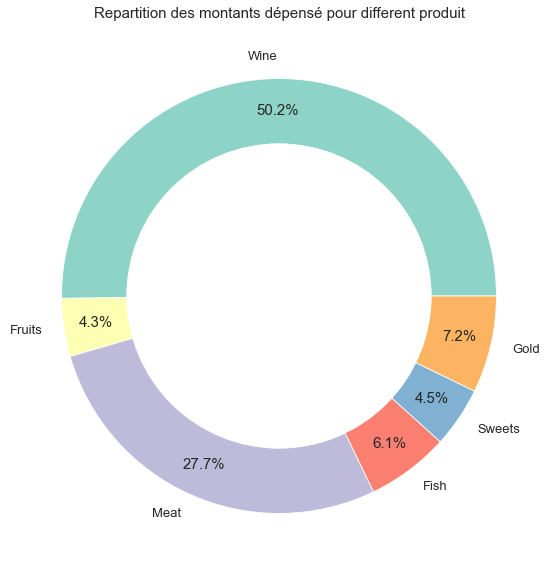

In [46]:
valeur4 = dict(mt)

plt.figure(figsize=(30, 10))
plt.title("Repartition des montants dépensé pour different produit")
plt.pie(valeur4.values(), labels=['Wine', 'Fruits', 'Meat',
                                'Fish', 'Sweets', 'Gold'], autopct="%1.1f%%", pctdistance=0.85, shadow=False, colors=PALETTE)
# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

In [47]:
#Montant total dépénsé pour chaque client
data['MtTotal'] = data.filter(like='Mnt').sum(axis=1)
data['MtTotal'] 

<ipython-input-47-2209033ed50d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MtTotal'] = data.filter(like='Mnt').sum(axis=1)


ID
5524     1617
2174       27
4141      776
6182       53
5324      422
         ... 
8080       22
10870    1341
7270     1241
8235      843
9405      172
Name: MtTotal, Length: 2050, dtype: int64

In [48]:
#Calcul des pourcentage 
data = data.assign(
        percentWines=lambda x: x['MntWines'] / x['MtTotal'] * 100,
        percentMeat=lambda x: x['MntMeatProducts'] / x['MtTotal'] * 100,
        percentFruits=lambda x: x['MntFruits'] / x['MtTotal'] * 100,
        percentFish=lambda x: x['MntFishProducts'] / x['MtTotal'] * 100,
        percentSweets=lambda x: x['MntSweetProducts'] / x['MtTotal'] * 100,
        percentGold=lambda x: x['MntGoldProds'] / x['MtTotal'] * 100,
)
display(data)

Age  CustomerFor   Education Marital_Status   Income  Kidhome  \
ID                                                                     
5524    64         3529  Graduation         Single  58138.0        0   
2174    67         2683  Graduation         Single  46344.0        1   
4141    56         3030  Graduation       Together  71613.0        0   
6182    37         2623  Graduation       Together  26646.0        1   
5324    40         2879         PhD        Married  58293.0        1   
...    ...          ...         ...            ...      ...      ...   
8080    35         3399  Graduation         Single  26816.0        0   
10870   54         3099  Graduation        Married  61223.0        0   
7270    40         2873  Graduation       Divorced  56981.0        0   
8235    65         2874      Master       Together  69245.0        0   
9405    67         3340         PhD        Married  52869.0        1   

       Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
ID                                                               
5524          0       58       635         88              546   
2174          1       38        11          1                6   
4141          0       26       426         49              127   
6182          0       26        11          4               20   
5324          0       94       173         43              118   
...         ...      ...       ...        ...              ...   
8080          0       50         5          1                6   
10870         1       46       709         43              182   
7270          0       91       908         48              217   
8235          1        8       428         30              214   
9405          1       40        84          3               61   

       MntFishProducts  MntSweetProducts  MntGoldProds  ...  AcceptedCmp4  \
ID                                                      ...                 
5524               172                88            88  ...       Refusée   
2174                 2                 1             6  ...       Refusée   
4141               111                21            42  ...       Refusée   
6182                10                 3             5  ...       Refusée   
5324                46                27            15  ...       Refusée   
...                ...               ...           ...  ...           ...   
8080                 3                 4             3  ...       Refusée   
10870               42               118           247  ...       Refusée   
7270                32                12            24  ...      Acceptée   
8235                80                30            61  ...       Refusée   
9405                 2                 1            21  ...       Refusée   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
ID                                                                    
5524        Refusée       Refusée       Refusée       Non  Acceptée   
2174        Refusée       Refusée       Refusée       Non   Refusée   
4141        Refusée       Refusée       Refusée       Non   Refusée   
6182        Refusée       Refusée       Refusée       Non   Refusée   
5324        Refusée       Refusée       Refusée       Non   Refusée   
...             ...           ...           ...       ...       ...   
8080        Refusée       Refusée       Refusée       Non   Refusée   
10870       Refusée       Refusée       Refusée       Non   Refusée   
7270        Refusée       Refusée       Refusée       Non   Refusée   
8235        Refusée       Refusée       Refusée       Non   Refusée   
9405        Refusée       Refusée       Refusée       Non  Acceptée   

      NumberOfChildren MtTotal percentWines percentMeat percentFruits  \
ID                                                                      
5524                 0    1617    39.270254   33.766234      5.442177   
2174                 2      27    40.740741   22.222222      3.703

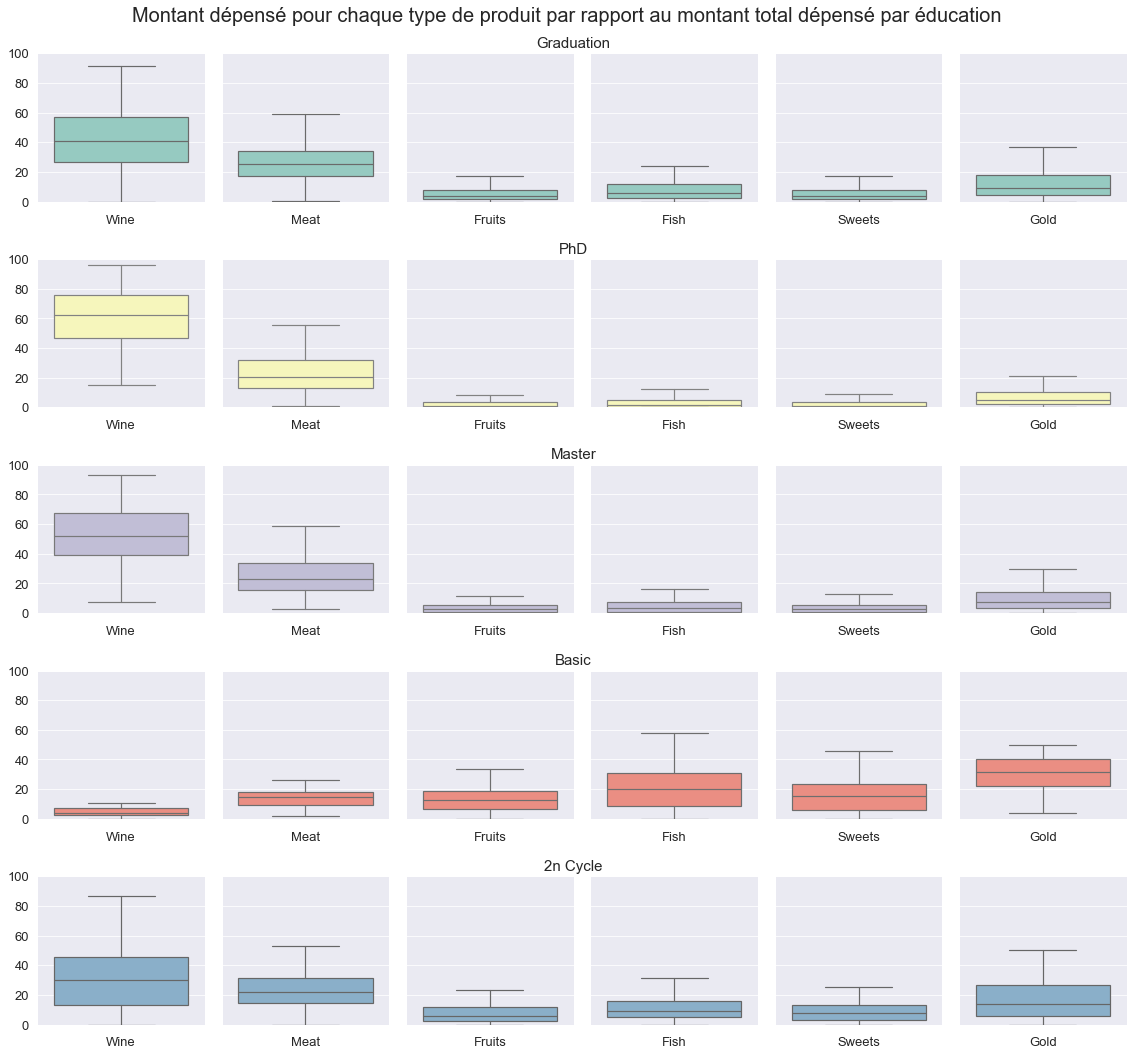

In [49]:
fig, axes = plt.subplots(5, 6, figsize=(16, 15), sharey=True)
fig.suptitle('Montant dépensé pour chaque type de produit par rapport au montant total dépensé par éducation', fontsize=20)

for i, value in enumerate(data['Education'].unique()):
    sns.boxplot(data=data.query(f'Education == "{value}"'), y='percentWines', showfliers=False, color=PALETTE[i], ax=axes[i, 0])
    axes[i, 0].set_ylim(0, 100)
    axes[i, 0].set_xlabel('Wine')
    axes[i, 0].set_ylabel('')
    
    sns.boxplot(data=data.query(f'Education == "{value}"'), y='percentMeat', showfliers=False, color=PALETTE[i], ax=axes[i, 1])
    axes[i, 1].set_xlabel('Meat')
    axes[i, 1].set_ylabel('')
    
    sns.boxplot(data=data.query(f'Education == "{value}"'), y='percentFruits', showfliers=False, color=PALETTE[i], ax=axes[i, 2])
    axes[i, 2].set_xlabel('Fruits')
    axes[i, 2].set_ylabel('')
    axes[i, 2].set_title(f'{value}', x=1)
    
    sns.boxplot(data=data.query(f'Education == "{value}"'), y='percentFish', showfliers=False, color=PALETTE[i], ax=axes[i, 3])
    axes[i, 3].set_xlabel('Fish')
    axes[i, 3].set_ylabel('')
    
    sns.boxplot(data=data.query(f'Education == "{value}"'), y='percentSweets', showfliers=False, color=PALETTE[i], ax=axes[i, 4])
    axes[i, 4].set_xlabel('Sweets')
    axes[i, 4].set_ylabel('')
    
    sns.boxplot(data=data.query(f'Education == "{value}"'), y='percentGold', showfliers=False, color=PALETTE[i], ax=axes[i, 5])
    axes[i, 5].set_xlabel('Gold')
    axes[i, 5].set_ylabel('')
    
plt.tight_layout()

In [50]:
data['DoYouHaveChildren'] = (data['NumberOfChildren'] >= 1).astype('int64')
data['DoYouHaveChildren']

ID
5524     0
2174     1
4141     0
6182     1
5324     1
        ..
8080     0
10870    1
7270     0
8235     1
9405     1
Name: DoYouHaveChildren, Length: 2050, dtype: int64

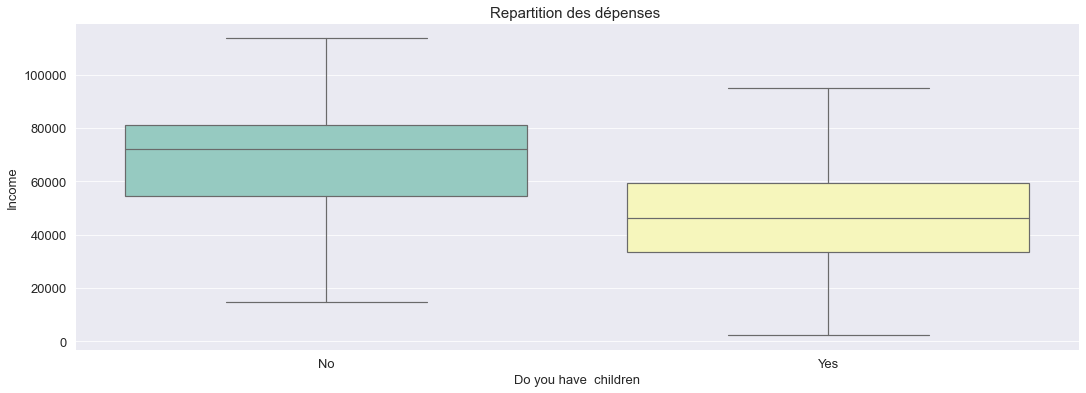

In [51]:
plt.figure(figsize=(18, 6))
ax = sns.boxplot(data=data.query('Income < 500000'), x='DoYouHaveChildren', y='Income', palette=PALETTE, showfliers=False)
plt.title('Repartition des dépenses ')
ax.set_xticklabels(['No', 'Yes'])
ax.set_xlabel('Do you have  children')

plt.show()

## ML with Pycaret.

### Setting up Environment in PyCaret

In [82]:
from pycaret.clustering import *

In [119]:
df = data.sample(frac=0.90, random_state=786)
df_unseen = data.drop(df.index)

df.reset_index(drop=True, inplace=True)
df_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(df.shape))
print('Unseen Data For Predictions: ' + str(df_unseen.shape))

Data for Modeling: (1845, 35)
Unseen Data For Predictions: (205, 35)


In [120]:
cluster = setup(data, normalize = True,ignore_features = ['DoYouHaveChildren'],session_id = 123)

### Create a Model

In [90]:
models()

Name  \
ID                                            
kmeans                   K-Means Clustering   
ap                     Affinity Propagation   
meanshift             Mean Shift Clustering   
sc                      Spectral Clustering   
hclust             Agglomerative Clustering   
dbscan     Density-Based Spatial Clustering   
optics                    OPTICS Clustering   
birch                      Birch Clustering   
kmodes                   K-Modes Clustering   

                                                   Reference  
ID                                                            
kmeans                        sklearn.cluster._kmeans.KMeans  
ap         sklearn.cluster._affinity_propagation.Affinity...  
meanshift              sklearn.cluster._mean_shift.MeanShift  
sc              sklearn.cluster._spectral.SpectralClustering  
hclust     sklearn.cluster._agglomerative.AgglomerativeCl...  
dbscan                        sklearn.cluster._dbscan.DBSCAN  
optics                        sklearn.cluster._optics.OPTICS  
birch                           sklearn.cluster._birch.Birch  
kmodes                                  kmodes.kmodes.KModes

In [129]:
kmean = create_model('kmeans',num_clusters = 5)

Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0       0.096           246.5671          2.5405            0           0   

   Completeness  
0             0

In [122]:
import numpy as np
kmeans = [create_model('kmeans',num_clusters = i) for i in np.arange(2,7,1)]

Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0      0.0731           215.2388          2.6621            0           0   

   Completeness  
0             0

In [123]:
print(len(kmeans))

5


In [130]:
kmode = create_model('kmodes',num_clusters = 5)

Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0      0.0318           131.8313          3.0982            0           0   

   Completeness  
0             0

In [131]:
kmodes = [create_model('kmodes',num_clusters = i) for i in np.arange(2,7,1)]

Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0      0.0295           105.3172          4.0256            0           0   

   Completeness  
0             0

In [132]:
print(len(kmodes))

5


### Assign a Model

In [133]:
kmean_results = assign_model(kmean)
kmean_results.head()

Age  CustomerFor   Education Marital_Status   Income  Kidhome  Teenhome  \
ID                                                                              
5524   64         3529  Graduation         Single  58138.0        0         0   
2174   67         2683  Graduation         Single  46344.0        1         1   
4141   56         3030  Graduation       Together  71613.0        0         0   
6182   37         2623  Graduation       Together  26646.0        1         0   
5324   40         2879         PhD        Married  58293.0        1         0   

      Recency  MntWines  MntFruits  ...  NumberOfChildren  MtTotal  \
ID                                  ...                              
5524       58       635         88  ...                 0     1617   
2174       38        11          1  ...                 2       27   
4141       26       426         49  ...                 0      776   
6182       26        11          4  ...                 1       53   
5324       94       173         43  ...                 1      422   

      percentWines  percentMeat  percentFruits  percentFish  percentSweets  \
ID                                                                           
5524     39.270254    33.766234       5.442177    10.636982       5.442177   
2174     40.740741    22.222222       3.703704     7.407407       3.703704   
4141     54.896907    16.365979       6.314433    14.304124       2.706186   
6182     20.754717    37.735849       7.547170    18.867925       5.660377   
5324     40.995261    27.962085      10.189573    10.900474       6.398104   

      percentGold  DoYouHaveChildren    Cluster  
ID                                               
5524     5.442177                  0  Cluster 1  
2174    22.222222                  1  Cluster 2  
4141     5.412371                  0  Cluster 0  
6182     9.433962                  1  Cluster 4  
5324     3.554502                  1  Cluster 2  

[5 rows x 36 columns]

### Plot a Model

#### Cluster PCA Plot

In [134]:
plot_model(kmean)

#### Elbow Plot

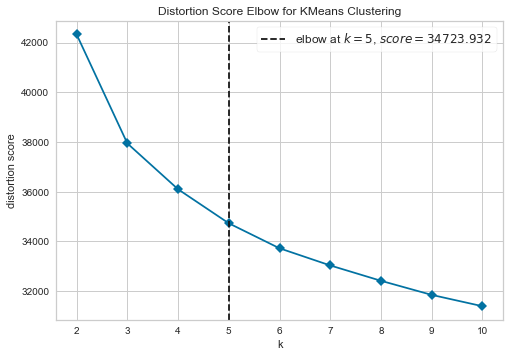

In [135]:
plot_model(kmean, plot = 'elbow')

#### Silhouette Plot

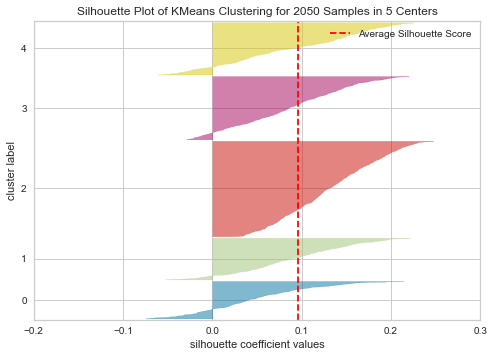

In [136]:
plot_model(kmean, plot = 'silhouette')

#### Distribution Plot

In [137]:
plot_model(kmean, plot = 'distribution') #to see size of clusters

In [138]:
plot_model(kmean, plot = 'distribution', feature = 'Marital_Status')

In [139]:
plot_model(kmean, plot = 'distribution', feature = 'Education')

### Predict on unseen data

In [141]:
unseen_predictions = predict_model(kmean, data=df_unseen)
unseen_predictions.head()

Age  CustomerFor   Education Marital_Status   Income  Kidhome  Teenhome  \
0   54         3011      Master       Together  62513.0        0         1   
1   36         3046         PhD        Married  33454.0        1         0   
2   69         2944      Master       Divorced  59354.0        1         1   
3   75         3385  Graduation       Together  37760.0        0         0   
4   51         3345  Graduation       Together  40548.0        0         1   

   Recency  MntWines  MntFruits  ...  NumberOfChildren  MtTotal  percentWines  \
0       16       520         42  ...                 1      716     72.625698   
1       32        76         10  ...                 1      169     44.970414   
2       53       233          2  ...                 2      310     75.161290   
3       20        84          5  ...                 0      317     26.498423   
4       31       110          0  ...                 1      120     91.666667   

   percentMeat  percentFruits  percentFish  percentSweets  percentGold  \
0    13.687151       5.865922     0.000000       5.865922     1.955307   
1    33.136095       5.917160     1.775148       0.591716    13.609467   
2    17.096774       0.645161     0.967742       1.612903     4.516129   
3    11.987382       1.577287    47.318612       3.785489     8.832808   
4     4.166667       0.000000     1.666667       0.000000     2.500000   

   DoYouHaveChildren    Cluster  
0                  1  Cluster 3  
1                  1  Cluster 2  
2                  1  Cluster 2  
3                  0  Cluster 4  
4                  1  Cluster 3  

[5 rows x 36 columns]

### Saving the model

In [142]:
save_model(kmean,'FinalKmeansModel')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['DoYouHaveChildren'],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='UNSUPERVISED_DUMMY_TARGET',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='most frequent',
                                 fill_value_categorical=None,
                                 fill_v...
                 ('fix_perfect', 'passthrough'),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 

### Loading the saved model

In [143]:
call_kmeans = load_model('FinalKmeansModel')

Transformation Pipeline and Model Successfully Loaded


In [144]:
new_prediction = predict_model(call_kmeans, data=df_unseen)

In [145]:
new_prediction.head()

Age  CustomerFor   Education Marital_Status   Income  Kidhome  Teenhome  \
0   54         3011      Master       Together  62513.0        0         1   
1   36         3046         PhD        Married  33454.0        1         0   
2   69         2944      Master       Divorced  59354.0        1         1   
3   75         3385  Graduation       Together  37760.0        0         0   
4   51         3345  Graduation       Together  40548.0        0         1   

   Recency  MntWines  MntFruits  ...  NumberOfChildren  MtTotal  percentWines  \
0       16       520         42  ...                 1      716     72.625698   
1       32        76         10  ...                 1      169     44.970414   
2       53       233          2  ...                 2      310     75.161290   
3       20        84          5  ...                 0      317     26.498423   
4       31       110          0  ...                 1      120     91.666667   

   percentMeat  percentFruits  percentFish  percentSweets  percentGold  \
0    13.687151       5.865922     0.000000       5.865922     1.955307   
1    33.136095       5.917160     1.775148       0.591716    13.609467   
2    17.096774       0.645161     0.967742       1.612903     4.516129   
3    11.987382       1.577287    47.318612       3.785489     8.832808   
4     4.166667       0.000000     1.666667       0.000000     2.500000   

   DoYouHaveChildren    Cluster  
0                  1  Cluster 3  
1                  1  Cluster 2  
2                  1  Cluster 2  
3                  0  Cluster 4  
4                  1  Cluster 3  

[5 rows x 36 columns]